In [32]:
from aeon.datasets import load_basic_motions, load_gunpoint
from s3ts.api.sts import finite_random_STS
import numpy as np

X, Y = load_basic_motions()
print(X.shape, Y.shape, len(np.unique(Y)))

Yn = np.zeros_like(Y, dtype=np.int8)
for i, y in enumerate(np.unique(Y)):
    Yn[Y == y] = i
Y = Yn

STS, SCS = finite_random_STS(X, Y, length=50)
print(STS.shape, SCS.shape)


(80, 6, 100) (80,) 4
(6, 5000) (5000,)


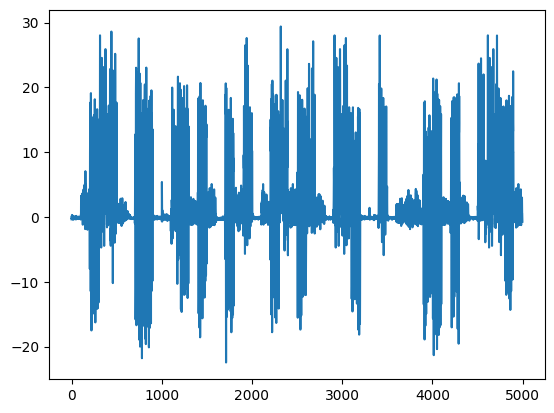

In [33]:
import matplotlib.pyplot as plt
plt.plot(STS[0]);

In [34]:
from s3ts.api.sts import compute_medoids
meds, meds_idx = compute_medoids(X, Y, meds_per_class=1, metric="dtw")
patts = meds.squeeze(1)
print(meds.shape, patts.shape)

(4, 1, 6, 100) (4, 6, 100)


In [35]:
from s3ts.api.img import compute_DM
DM = compute_DM(STS, patts, rho=0.1)

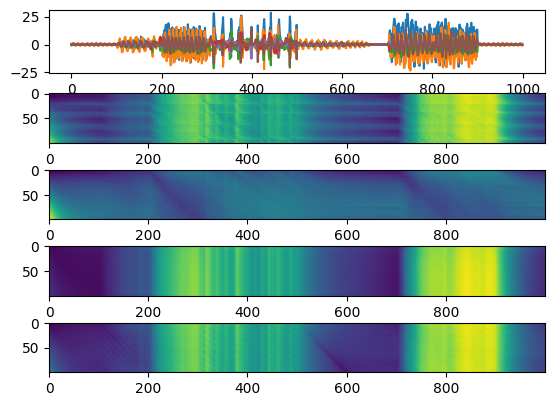

In [36]:
import matplotlib.pyplot as plt
npoints = 1000
fig, ax = plt.subplots(nrows=len(np.unique(Y))+1)
axi: plt.Axes = ax[0]
axi.set_xlim(0, npoints)
[axi.plot(STS[d,:npoints]) for d in range(STS.shape[0])]
for i in range(len(np.unique(Y))):
    axi: plt.Axes = ax[i+1]
    axi.imshow(DM[i,:,:npoints])